In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.randint(0, 1000, 450)
X_test = np.random.randint(1000, 5000, 20)

In [3]:
X.shape

(450,)

In [4]:
u = X.mean()
std = X.std()
X = (X - u)/std

u = X_test.mean()
std = X_test.std()
X_test = (X_test - u)/std

In [5]:
Y = []
for i in X:
    Y.append(3 * i + 21)

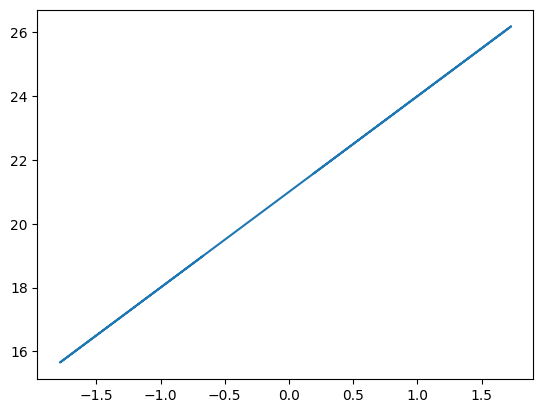

In [6]:
plt.plot(X, Y)

In [7]:
def hypothesis(X, weights):
    y = weights[0] + weights[1] * X[1]
    return y

In [8]:
def loss_func(X, Y, weights):
    loss = 0
    for i in range(X.shape[0]):
        y_pred = hypothesis(X[i], weights)
        
        loss += (y_pred - Y[i]) ** 2
    return loss/X.shape[0]

In [9]:
def gradient(X, Y, weights):
    grad = np.zeros((2, ))
    
    for i in range(X.shape[0]):
        y_pred = hypothesis(X[i], weights)
        
        grad[0] += (y_pred - Y[i]) * X[i][0]
        grad[1] += (y_pred - Y[i]) * X[i][1]
        
    return grad/X.shape[0]

In [10]:
def gradient_descent(X, Y, alpha = 0.003):
    weights = np.zeros((2, ))
    
    cost = []
    
    epochs = 10000
    for i in range(epochs):
        grad = gradient(X, Y, weights)
        cost.append(loss_func(X, Y, weights))
        
        weights[0] = weights[0] - alpha * grad[0]
        weights[1] = weights[1] - alpha * grad[1]
        
    return cost, weights

In [11]:
X = X.reshape((-1, 1))
x0 = np.ones((X.shape[0], 1))
X = np.hstack((x0, X))

In [12]:
X.shape

(450, 2)

In [13]:
Y = np.array(Y)
Y = Y.reshape((-1, 1))

In [14]:
cost, weights = gradient_descent(X, Y)

In [15]:
weights

array([21.,  3.])